In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from numpy import mean
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv(r'C:\Users\Abolaji\Desktop\AI_SAT_ML\project\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#SHAPE OF DATASET
data.shape


(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#CHECKING UNIQUE ITEM ON THE TARGET COLUMN
data.Class.unique()

array([0, 1], dtype=int64)

In [6]:
#CHECKING THE STATISTICS OF THE DATASET
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
#CHECKING FOR MISSING VARIABLES
data.isna().values.any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

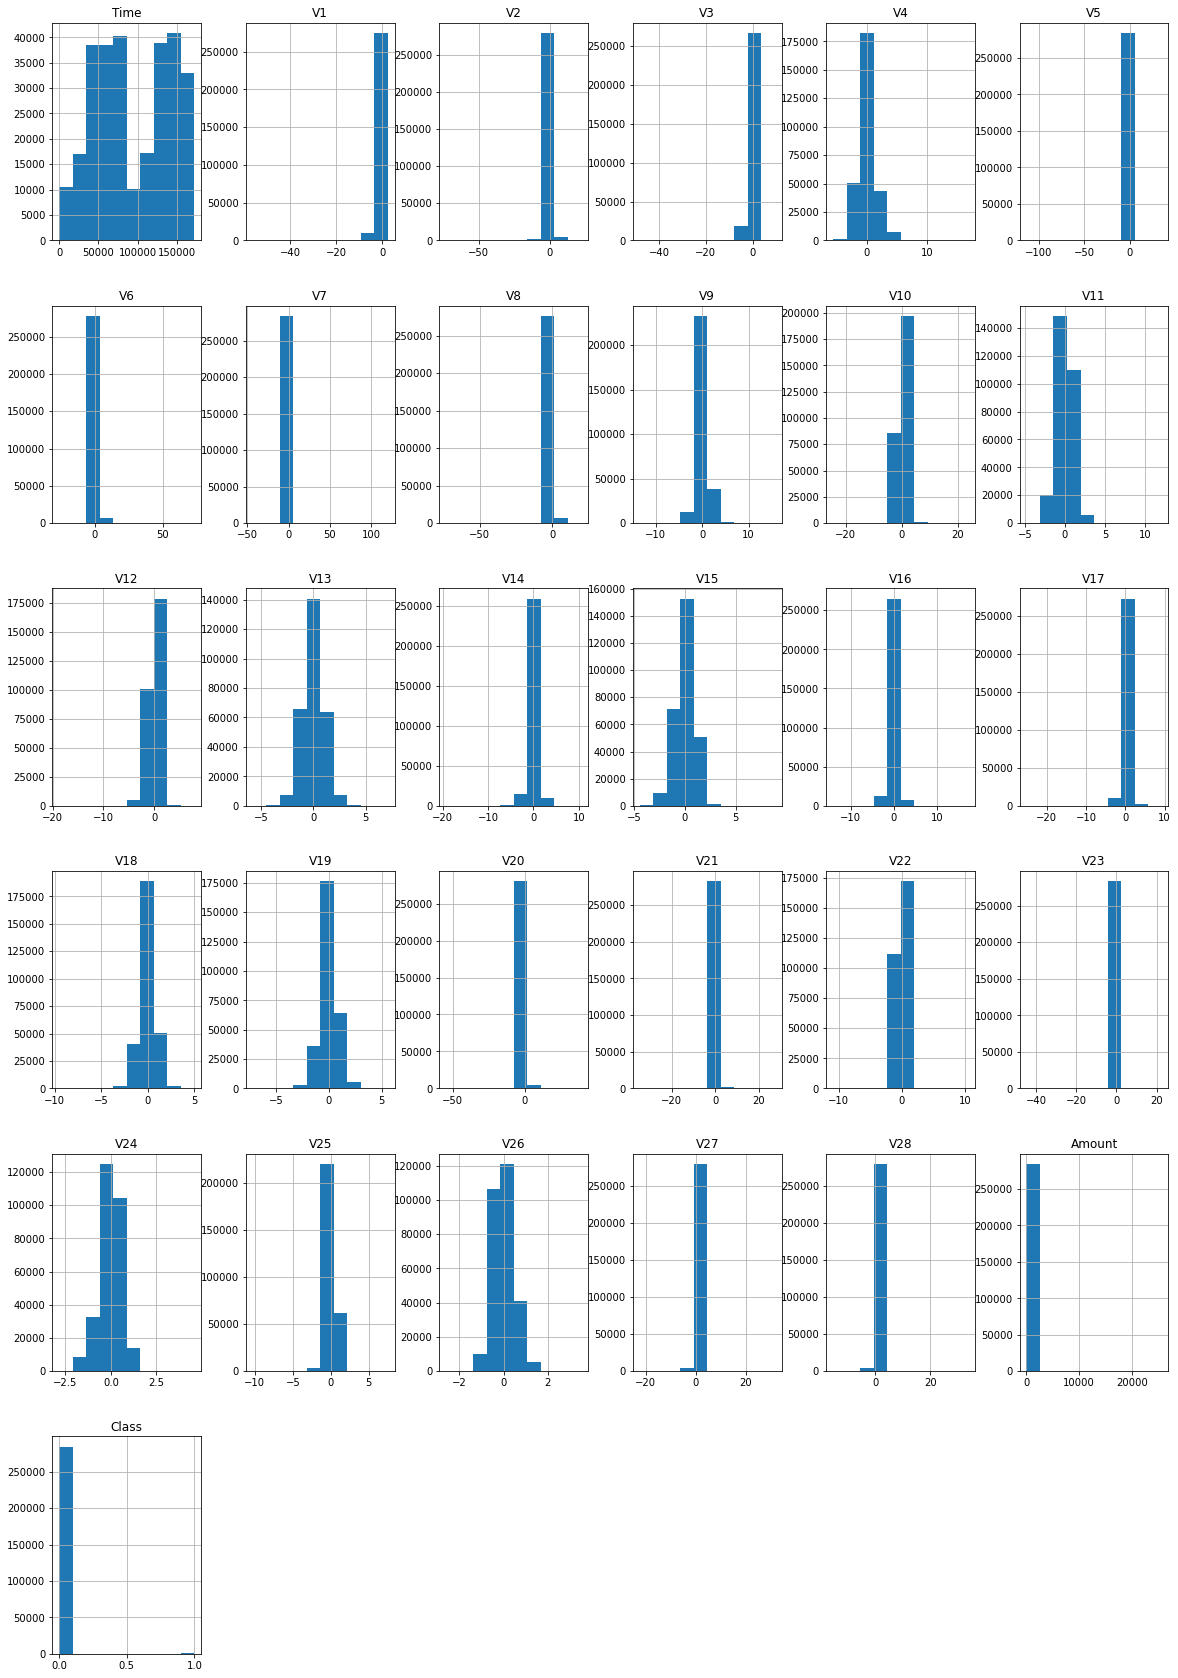

In [10]:
data.hist(figsize=(20,30))
plt.show

In [11]:
np.abs(data.corr()["Class"].sort_values())

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V6        0.043643
Time      0.012323
V24       0.007221
V13       0.004570
V15       0.004223
V23       0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

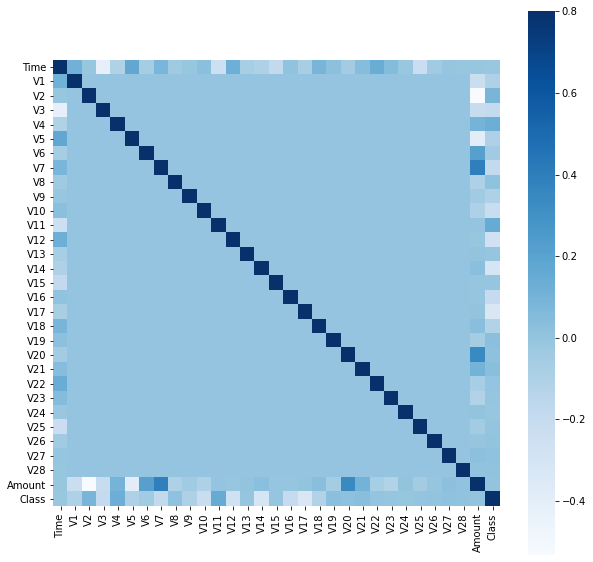

In [12]:
#CHECKING FOR CORRELATIONS IN THE DATASET
plt.subplots(figsize=(10,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,vmax=0.8,square=True,cmap="Blues")
plt.show()

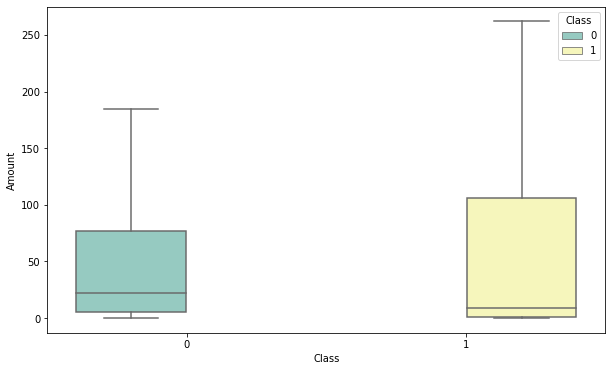

In [13]:
#BOXPLOT FOR DISTRIBUTION OF UNIQUE ITEMS IN CLASS AGAINST AMO
fig, ax1 = plt.subplots(figsize=(10,6))
a = sns.boxplot(ax=ax1, x= 'Class',y= 'Amount', data=data, hue='Class', palette='Set3', showfliers=False)
plt.show()

In [ ]:
counter = Counter(data.Class)
print(counter)

In [14]:
#Masking the Class column to group for Fraud and Valid transactions
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

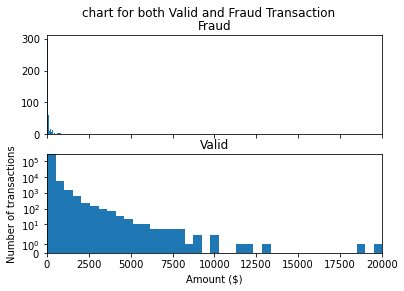

In [15]:
#PLOTTING CLASS GROUP AGAINST AMOUNT
b, (ax1, ax2) = plt.subplots(2,1,sharex=True)
b.suptitle('chart for both Valid and Fraud Transaction')
bins=50
ax1.hist(Fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(Valid.Amount, bins=bins)
ax2.set_title('Valid')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('symlog')
plt.show()

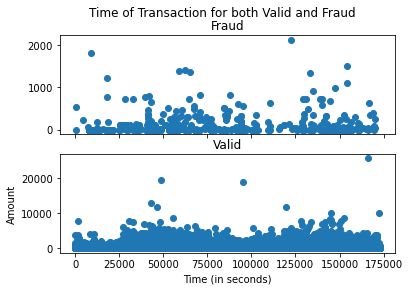

In [36]:
#PLOTTING TIME AGAINST AMOUNT FOR CLASS GROUP
b, (ax1, ax2) = plt.subplots(2,1,sharex=True)
b.suptitle('Time of Transaction for both Valid and Fraud')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Valid.Time, Valid.Amount)
ax2.set_title('Valid')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [17]:
#CHECKING FOR IMBALANCES IN COLUMN CLASS
unique, count = np.unique(data.Class, return_counts=True)
catego_dict = {k:v for(k,v) in zip(unique,count)}
catego_dict
                          

{0: 284315, 1: 492}

<function matplotlib.pyplot.show(close=None, block=None)>

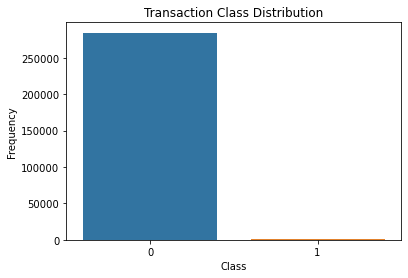

In [18]:
#DISPLAYING THE RATIO OF UNIQUE ITEM IN CLASS
ax=sns.countplot(x='Class', data=data)
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show

In [20]:
y = data['Class']
X = data.drop('Class', axis=1)
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [35]:
#Defining pipeline
start_time = datetime.now()
steps = [('over', SMOTE()), ('model', XGBClassifier(
    learning_rate =0.1, 
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    use_label_encoder= False,
    random_state=27))]
pipe = Pipeline(steps=steps)

#Evaluating pipeline

fold=StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
scoring = ['accuracy', 'precision','f1','recall', 'roc_auc']
cv_results = cross_validate(pipe, X, y, scoring=scoring, cv=fold)

#DISPLAYING RESULT
print("WHOLE RESULT: ", cv_results)
print("ACCURACY: ",mean(cv_results['test_accuracy']))
print("PRECISION: ",mean(cv_results['test_precision']))
print("F1_SCORE: ",mean(cv_results['test_f1']))
print("RECALL: ",mean(cv_results['test_recall']))
print("ROC-AUC: ",mean(cv_results['test_roc_auc']))
end_time = datetime.now()
print(end_time-start_time)

[22:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
WHOLE RESULT:  {'fit_time': array([1724.60329437, 1114.61747074, 1041.